# Qiskit Day 5 Challenge Problems

Below is a list of problems to help you practice the skills you have learned so far. Try to come up with the solution on your own and see how far you get. Our solutions can be found at the bottom of the page.

In [2]:
## Add your imports here:

### __Problem 1:__ Swap States $\ket{01} \rightarrow \ket{10}$ with a Broken X Gate

You are working in your lab when, out of the blue, your X gate stops working after a single use. Thankfully, your CX (Control NOT) appears to be fine. You were able to use your X gate to produce the two-qubit state $\ket{01}$. However, you need to use only CX gates to convert it to the state $\ket{10}$. Measure your system to ensure you produce the desired outcome with 100% certainty.

Steps:
- Initialize your two-qubit system
- Use your X gate exactly once to produce the state $\ket{01}$
- Use only CX gates to convert it to the state $\ket{10}$
- Measure your system and display the results (note that histogram labels are written backwards i.e. q3 q2 q1 q0)

In [3]:
## Your solution to Problem 1:

### __Problem 2:__ Produce the $\ket{\Phi^+}$ Bell State

The Bell states are a set of four maximally entangled states for a two-qubit system. Broadly speaking, a system is maximally entangled if you can measure just one qubit and gain complete information about the other.

The Bell States are:

$\ket{\Phi^+} = \frac{1}{\sqrt{2}} (\ket{00} + \ket{11})$

$\ket{\Phi^-} = \frac{1}{\sqrt{2}} (\ket{00} - \ket{11})$

$\ket{\Psi^+} = \frac{1}{\sqrt{2}} (\ket{01} + \ket{10})$

$\ket{\Psi^-} = \frac{1}{\sqrt{2}} (\ket{01} - \ket{10})$

To understand why these states are maximally entangled, let us examine the $\ket{\Phi^+}$ state in particular. In this state, the only possible outcomes are $\ket{00}$ and $\ket{11}$, meaning the two qubits always yield the same measured outcome. Therefore, if you measure one qubit to be $0$, you immediately know the other qubit must be $0$ as well.

For this problem, try to produce the $\ket{\Phi^+}$ Bell state in a two-qubit system using the gates we have learned about.

HINT: In order to produce an entangled state, you must use a two-qubit gate (such as CX). You should place one qubit into a 50-50 superposition and use another gate that ensure that the two qubits will always yield the same outcome.

Steps:
- Initialize your two-qubit system
- Use a gate to place $q_0$ into a 50-50 superposition
- Use a two-qubit gate to enforce the rule: if $q_0$ measures $0$, $q_1$ should measure $0$ ; if $q_0$ measures 1, $q_1$ should measure $1$.
- Measure your system and display the results

In [4]:
## Your solution to Problem 2:


### __Problem 2+:__ Produce the other Bell States

For this problem, start with your solution from Problem 2. After you produce the $\ket{\Phi^+}$ state, it is possible to use one or two additional gates to convert it to a different Bell state. By comparing the forms of the various Bell states, you should try to determine what changes must be made to convert from one to the other, and what gates produce those changes.

Steps:
- Reimplement your solution from Problem 2 above three separate times (once for every remaining Bell state)
- Apply to necessary additional gates to produce your desired Bell state
- Measure your system and display the results

In [5]:
## Your solution to Problem 2+ (Phi -):


In [6]:
## Your solution to Problem 2+ (Psi +):


In [7]:
## Your solution to Problem 2+ (Psi -):


### __Problem 3:__ Produce the GHZ State

The Greenberger-Horne-Zeilinger (GHZ) state can be thought of as an extension of the $\ket{\Phi^+}$ Bell state for systems with three or more qubits. It is written as:

$\ket{GHZ} = \frac{1}{\sqrt{2}} (\ket{0000...} + \ket{1111...})$

The GHZ state exhibits maximal global entanglement. This means that a measurement on any qubit in the entire system reveals information about every single qubit in the system and collapses them all simultaneously. It is similar to the $\ket{\Phi^+}$ state in that every qubit will always measure the same value. Therefore, you should use your implementation in Problem 2 as inspiration. For this problem, keep your system as general as possible and produce a GHZ state for an arbitrary system size.

Steps:
- Define the parameter 'system_size'
- Initialize your quantum system with as many qubits as defined by 'system_size'
- Use a gate to place $q_0$ into a 50-50 superposition
- Use gates to enforce the rule that every qubit should display the same result as $q_0$. A for loop may be helpful
- Measure your system and display the results. A for loop may be helpful again

In [8]:
## Your solution to Problem 3:


## __Solutions:__

Below are our solutions to the problems. Make sure to give the problems a try yourself before comparing!

In [9]:
## Here are the packages we recommend importing

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import Aer
import matplotlib as mpl
import matplotlib.pyplot as plt
from math import pi
import numpy as np

### __Solution for Problem 1:__ Swap States $\ket{01} \rightarrow \ket{10}$ with a Broken X Gate

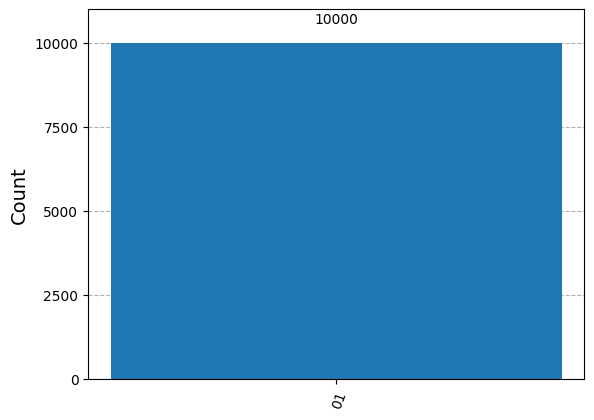

In [11]:
## Begin by initializing your system with two qubits and two classical bits

qc = QuantumCircuit(2,2)

## The state starts as |00>. Apply your X gate once on q1 to flip it to |01> (before your X gate breaks)

qc.x(1)

## We apply CX once with q1 as a control and q0 as the target. Since the control measures 1, it will flip the target. Our state will now become |11>.

qc.cx(1,0)

## We apply CX again, this time with q0 as the control and q1 as the target. Since the control measures 1, it will flip the target. Our state now becomes |10>.

qc.cx(0,1)

## End the circuit by measuring the qubits

qc.measure(0,0)
qc.measure(1,1)

## Run the job 

simulator = Aer.get_backend('statevector_simulator')
job = transpile(qc, simulator)
result = simulator.run(job, shots=10000).result()
outputstate = result.get_statevector(qc)
results = result.get_counts(qc)

drawing = qc.draw(output='mpl')
histogram = plot_histogram(results)

# Display the results. We expect every result to be 01 (not 10). This is because the histogram labels are written backwards (i.e. q3 q2 q1 q0).
histogram

### __Solution for Problem 2:__ Produce the $\ket{\Phi^+}$ Bell State

In [ ]:
## Begin by initializing your system with two qubits and two classical bits

qc = QuantumCircuit(2,2)

## We place q0 into a 50-50 superposition by using the Hadamard gate

qc.h(0)

## To implement the rule that the two qubits should display the same results, we use a CX gate with q0 as the control and q1 as the target.
## If q0 is 0, q1 remains 0. If q0 is 1, q1 is flipped by the CX gate to be 1. In either case, the two qubits measure the same result

qc.cx(0,1)

## End the circuit by measuring the qubits

qc.measure(0,0)
qc.measure(1,1)

## Run the job 

simulator = Aer.get_backend('statevector_simulator')
job = transpile(qc, simulator)
result = simulator.run(job, shots=10000).result()
outputstate = result.get_statevector(qc)
results = result.get_counts(qc)

drawing = qc.draw(output='mpl')
histogram = plot_histogram(results)

# Display the results. We expect to see a 50-50 split between |00> and |11>
histogram

### __Solution for Problem 2+:__ Produce the other Bell States

In [ ]:
## Solution for Phi-

## We start with the same circuit as Phi+

qc = QuantumCircuit(2,2)

qc.h(0)

qc.cx(0,1)

## To produce the Phi- state, we want the |11> component of the state to have a negative sign in the coefficient. To do this, we will use a Z gate.
## Recall that the Z gate converts |0> --> |0> and |1> --> -|1>
## We can apply it to either of the qubits and produce the same result

qc.z(0)

## End the circuit by measuring the qubits

qc.measure(0,0)
qc.measure(1,1)

## Run the job 

simulator = Aer.get_backend('statevector_simulator')
job = transpile(qc, simulator)
result = simulator.run(job, shots=10000).result()
outputstate = result.get_statevector(qc)
results = result.get_counts(qc)

drawing = qc.draw(output='mpl')
histogram = plot_histogram(results)

## Display the results. We expect to see a 50-50 split between |00> and |11>. 
## Note that this is the same result as Phi+, since the probabilities only depend on the squared absolute value of the coefficients 
histogram

In [ ]:
## Solution for Psi+

## We start with the same circuit as Phi+

qc = QuantumCircuit(2,2)

qc.h(0)

qc.cx(0,1)

## To produce the Psi+ state, we want the two possible outcomes to be |01> and |10>. We can do this by a bit after making the Phi+ state
## Recall that the X gate converts |0> --> |1> and |1> --> |0>
## We can apply it to either of the qubits and produce the same result

qc.x(0)

## End the circuit by measuring the qubits

qc.measure(0,0)
qc.measure(1,1)

## Run the job 

simulator = Aer.get_backend('statevector_simulator')
job = transpile(qc, simulator)
result = simulator.run(job, shots=10000).result()
outputstate = result.get_statevector(qc)
results = result.get_counts(qc)

drawing = qc.draw(output='mpl')
histogram = plot_histogram(results)

## Display the results. We expect to see a 50-50 split between |01> and |10>. 
histogram

In [ ]:
## Solution for Psi-

## We start with the same circuit as Phi+

qc = QuantumCircuit(2,2)

qc.h(0)

qc.cx(0,1)

## To produce the Psi- state, we want the two possible outcomes to be |01> and |10>, but with a negative sign. 
## We can do this by producing the Psi+ state first, using the X gate

qc.x(0)

## We add an additional Z gate to produce the negative sign in the coefficient. We can add this on either of the bits.

qc.z(0)

## End the circuit by measuring the qubits

qc.measure(0,0)
qc.measure(1,1)

## Run the job 

simulator = Aer.get_backend('statevector_simulator')
job = transpile(qc, simulator)
result = simulator.run(job, shots=10000).result()
outputstate = result.get_statevector(qc)
results = result.get_counts(qc)

drawing = qc.draw(output='mpl')
histogram = plot_histogram(results)

## Display the results. We expect to see a 50-50 split between |01> and |10>. 
## Note that this is the same result as Psi+, since the probabilities only depend on the squared absolute value of the coefficients 
histogram

### __Solution for Problem 3:__ Produce the GHZ State

In [ ]:
## Start by defining a parameter called 'system_size'. Set it to some arbitrary value

system_size = 10

## Initialize your system with the necessary number of qubits and classical bits

qc = QuantumCircuit(system_size, system_size)

## Place q0 into a 50-50 superposition using the Hadamard gate

qc.h(0)

## With a for loop running from q1 to the last qubit, we will apply a control gate with every other qubit in the system, with q0 as the control each time
## Similar to the Phi+ Bell state, this ensures that every qubit measures the same outcome
## Alternatively, your for loop could have the control qubit be the previous qubit

for i in range(1,system_size):
    qc.cx(0,i)

## End the circuit by measuring the qubits using another for loop (this time from q0 to the last qubit)

for i in range(system_size):
    qc.measure(i,i)

## Run the job 

simulator = Aer.get_backend('statevector_simulator')
job = transpile(qc, simulator)
result = simulator.run(job, shots=10000).result()
outputstate = result.get_statevector(qc)
results = result.get_counts(qc)

drawing = qc.draw(output='mpl')
histogram = plot_histogram(results)

## Display the results. We expect to see a 50-50 split between |0000...> and |1111...>. 
histogram